In [54]:
from pyabc import History
import pandas as pd
from ionchannelABC.utils import weighted_cv
from pyabc.weighted_statistics import weighted_mean
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

### Load history files

In [55]:
store_path = '/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/'

In [56]:
h_nyg_r_reported = History('sqlite:///'+store_path+
                         'nygren/isus/reported/nygren_isus_rgate_reported.db')
h_nyg_s_reported = History('sqlite:///'+store_path+
                         'nygren/isus/reported/nygren_isus_sgate_reported.db')

In [57]:
h_nyg_r = History('sqlite:///'+store_path+
                         'nygren/isus/full/nygren_isus_rgate_full.db')
h_nyg_s = History('sqlite:///'+store_path+
                         'nygren/isus/full/nygren_isus_sgate_full.db')

In [58]:
h_cou_a_reported = History('sqlite:///'+store_path+
                         'courtemanche/isus/reported/courtemanche_isus_agate_reported.db')
h_cou_i_reported = History('sqlite:///'+store_path+
                         'courtemanche/isus/reported/courtemanche_isus_igate_reported.db')

In [59]:
h_cou_a = History('sqlite:///'+store_path+
                  'courtemanche/isus/full/courtemanche_isus_agate_full.db')
h_cou_i = History('sqlite:///'+store_path+
                  'courtemanche/isus/full/courtemanche_isus_igate_full.db')

In [60]:
h_sta = History('sqlite:///'+store_path+
                'standardised/isus/standardised_isus.db')

## Load databases and weightings

### NYG

In [61]:
df_nyg_reported_r, w_nyg_reported_r = h_nyg_r_reported.get_distribution(m=0)
df_nyg_reported_s, w_nyg_reported_s = h_nyg_s_reported.get_distribution(m=0)

In [62]:
df_nyg_r, w_nyg_r = h_nyg_r.get_distribution(m=0)
df_nyg_s, w_nyg_s = h_nyg_s.get_distribution(m=0)

### COU

In [63]:
df_cou_reported_a, w_cou_reported_a = h_cou_a_reported.get_distribution(m=0)
df_cou_reported_i, w_cou_reported_i = h_cou_i_reported.get_distribution(m=0)

In [64]:
df_cou_a, w_cou_a = h_cou_a.get_distribution(m=0)
df_cou_i, w_cou_i = h_cou_i.get_distribution(m=0)

### STA

In [65]:
df_sta, w_sta = h_sta.get_distribution(m=0)

## Compare number of parameters

In [66]:
data = [['N',6,7],['C',13,7],['S',4,4]]

In [67]:
df = pd.DataFrame(data, columns = ['model', 'act', 'inact'])

In [68]:
df.inact = df.act+df.inact

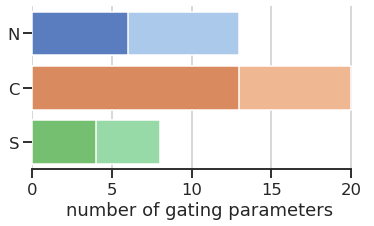

In [69]:
sns.set(style="ticks")
sns.set_context('talk')
sns.set_color_codes("pastel")

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

f, ax = plt.subplots(figsize=(6,3))

sns.barplot(x="inact", y="model", hue="model", data=df,
            palette="pastel", dodge=False)
            #label="inact", color="b")

sns.set_color_codes("muted")
sns.barplot(x="act", y="model", hue="model", data=df,
            palette="muted", dodge=False)
            #label="act", color="r")

handles, labels = ax.get_legend_handles_labels()
order = []
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
          ncol=2, loc="lower right", frameon=False)
ax.set(xlabel="number of gating parameters")
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [70]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/isus/param_num_compare.pdf')

### Compare original and full datasets

In [217]:
cv_nyg_reported_r = weighted_cv(df_nyg_reported_r, w_nyg_reported_r, sample_size=len(df_nyg_reported_r))
cv_nyg_reported_s = weighted_cv(df_nyg_reported_s, w_nyg_reported_s, sample_size=len(df_nyg_reported_s))

cv_nyg_reported = pd.concat([cv_nyg_reported_r, cv_nyg_reported_s])
model = ['N',]*len(cv_nyg_reported)
data = ['ORIGINAL',]*len(cv_nyg_reported)
frame = {'model': model, 'data': data, 'CV': cv_nyg_reported}
nyg_reported = pd.DataFrame(frame)

In [218]:
cv_nyg_r = weighted_cv(df_nyg_r, w_nyg_r, sample_size=len(df_nyg_r))
cv_nyg_s = weighted_cv(df_nyg_s, w_nyg_s, sample_size=len(df_nyg_s))

cv_nyg = pd.concat([cv_nyg_r, cv_nyg_s])
model = ['N',]*len(cv_nyg)
data = ['COMPLETE',]*len(cv_nyg)
frame = {'model': model, 'data': data, 'CV': cv_nyg}
nyg = pd.DataFrame(frame)

In [219]:
cv_cou_a_reported = weighted_cv(df_cou_reported_a, w_cou_reported_a, sample_size=len(df_cou_reported_a))
cv_cou_i_reported = weighted_cv(df_cou_reported_i, w_cou_reported_i, sample_size=len(df_cou_reported_i))

cv_cou_reported = pd.concat([cv_cou_a_reported, cv_cou_i_reported])
model = ['C',]*len(cv_cou_reported)
data = ['ORIGINAL',]*len(cv_cou_reported)
frame = {'model': model, 'data': data, 'CV': cv_cou_reported}
cou_reported = pd.DataFrame(frame)

In [220]:
cv_cou_a = weighted_cv(df_cou_a, w_cou_a, sample_size=len(df_cou_a))
cv_cou_i = weighted_cv(df_cou_i, w_cou_i, sample_size=len(df_cou_i))

cv_cou = pd.concat([cv_cou_a, cv_cou_i])
model = ['C',]*len(cv_cou)
data = ['COMPLETE',]*len(cv_cou)
frame = {'model': model, 'data': data, 'CV': cv_cou}
cou = pd.DataFrame(frame)

In [221]:
compare_reported_full = pd.concat([nyg_reported, nyg])

(array([0, 1]), <a list of 2 Text xticklabel objects>)

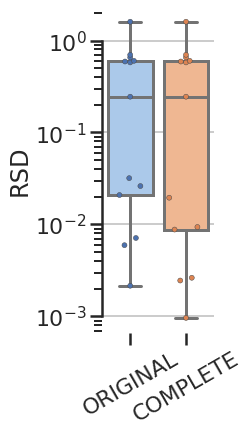

In [222]:
sns.set(style="ticks")
sns.set_context('poster')
sns.set_color_codes('pastel')

# Initialize the figure
f, ax = plt.subplots(figsize=(2, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x='data', y='CV', data=compare_reported_full,
            palette="pastel", whis="range")

# Add in points to show each observation
sns.swarmplot(x='data', y='CV', data=compare_reported_full,
              dodge=True, linewidth=0.5
            )

# Tweak the visual presentation
ax.yaxis.grid(True)
ax.set(ylabel="RSD")
ax.set_yscale('log')
ax.set(xlabel="")
sns.despine(trim=True, bottom=True)

# statistical annotation
#x1, x2 = 0, 1   # columns
#y, h, col = compare_reported_full['CV'].max() + 0.02, 0.02, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h, "p = 0.26", ha='center', va='bottom', color=col)

plt.xticks(rotation=30)

In [223]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/isus/nyg_add_data.pdf')

In [216]:
diff = nyg.CV-nyg_reported.CV
ss.wilcoxon(diff)

AttributeError: 'str' object has no attribute 'CV'

In [79]:
diff = cou.CV-cou_reported.CV
ss.wilcoxon(diff)

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/scipy/stats/morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=5.0, pvalue=0.12819017434510785)

In [80]:
nyg_pars_reported_r = df_nyg_reported_r.sample(n=100, weights=w_nyg_reported_r, replace=True)
nyg_pars_reported_r = nyg_pars_reported_r.set_index([pd.Index(range(100))])
nyg_pars_reported_s = df_nyg_reported_s.sample(n=100, weights=w_nyg_reported_s, replace=True)
nyg_pars_reported_s = nyg_pars_reported_s.set_index([pd.Index(range(100))])

nyg_pars_reported = pd.concat([nyg_pars_reported_r, nyg_pars_reported_s],axis=1).to_dict(orient='records')

In [81]:
N = 100
nyg_pars_r = df_nyg_r.sample(n=N, weights=w_nyg_r, replace=True)
nyg_pars_r = nyg_pars_r.set_index([pd.Index(range(N))])
nyg_pars_s = df_nyg_s.sample(n=N, weights=w_nyg_s, replace=True)
nyg_pars_s = nyg_pars_s.set_index([pd.Index(range(N))])
nyg_pars = pd.concat([nyg_pars_r, nyg_pars_s],axis=1).to_dict(orient='records')

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


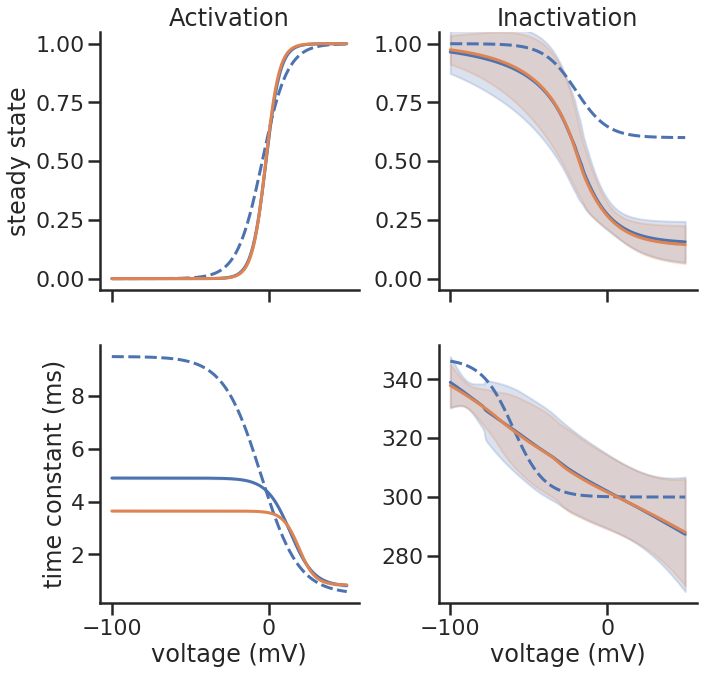

In [82]:
from ionchannelABC.visualization import plot_variables
sns.set_context('poster')
sns.set_palette('deep')
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

v = np.arange(-100, 50, 0.5)

nyg_vars = {'ri': 'isus.r_inf',
            'si': 'isus.s_inf',
            'rt': 'isus.tau_r',
            'st': 'isus.tau_s'}

f, ax = plot_variables(v, [nyg_vars, nyg_vars], 
                       ['models/nygren_isus.mmt', 'models/nygren_isus_full.mmt'], 
                       [nyg_pars_reported, nyg_pars],
                       original=[True,False],
                       figshape=(2,2))

ax[0][0].set_ylabel('steady state')
for a in ax[0][1:]:
    a.set_ylabel('')
ax[0][0].set_title('Activation')
ax[0][1].set_title('Inactivation')

for a in ax[0][:]:
    a.set_ylim((-0.05, 1.05))
    
#lim=200
#ax[1][0].set_ylim((-0.05*lim, 1.05*lim))
#lim=2000
#ax[1][1].set_ylim((-0.05*lim, 1.05*lim))
#lim=2000
#ax[1][2].set_ylim((-0.05*lim, 1.05*lim))

ax[1][0].set_ylabel('time constant (ms)')
for a in ax[1][1:]:
    a.set_ylabel('')
    
for a in ax[1][:]:
    a.set_xlabel('voltage (mV)')
    
for a in ax.flatten():
    x0,x1 = a.get_xlim()
    y0,y1 = a.get_ylim()
    a.set_aspect(abs(x1-x0)/abs(y1-y0))
    
plt.tight_layout()

In [83]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/isus/nyg_add_data_gates.pdf')

In [84]:
cou_pars_reported_a = df_cou_reported_a.sample(n=100, weights=w_cou_reported_a, replace=True)
cou_pars_reported_a = cou_pars_reported_a.set_index([pd.Index(range(100))])
cou_pars_reported_i = df_cou_reported_i.sample(n=100, weights=w_cou_reported_i, replace=True)
cou_pars_reported_i = cou_pars_reported_i.set_index([pd.Index(range(100))])

cou_pars_reported = pd.concat([cou_pars_reported_a, cou_pars_reported_i],axis=1).to_dict(orient='records')

In [85]:
N = 100
cou_pars_a = df_cou_a.sample(n=N, weights=w_cou_a, replace=True)
cou_pars_a = cou_pars_a.set_index([pd.Index(range(N))])
cou_pars_i = df_cou_i.sample(n=N, weights=w_cou_i, replace=True)
cou_pars_i = cou_pars_i.set_index([pd.Index(range(N))])
cou_pars = pd.concat([cou_pars_a, cou_pars_i],axis=1).to_dict(orient='records')

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


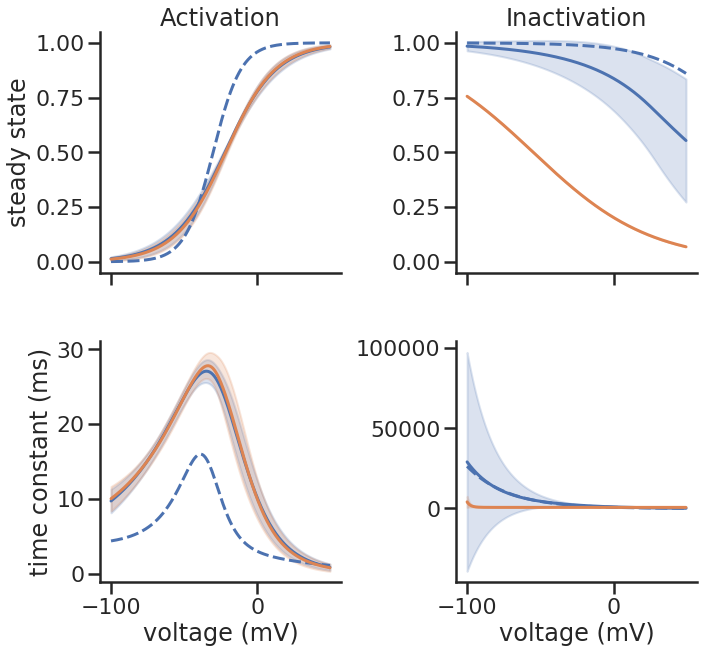

In [86]:
from ionchannelABC.visualization import plot_variables
sns.set_context('poster')
sns.set_palette('deep')
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

v = np.arange(-100, 50, 0.5)

cou_vars = {'ri': 'isus.a_inf',
            'si': 'isus.i_inf',
            'rt': 'isus.tau_a',
            'st': 'isus.tau_i'}

f, ax = plot_variables(v, [cou_vars, cou_vars], 
                       ['models/courtemanche_isus.mmt', 'models/courtemanche_isus_full.mmt'], 
                       [cou_pars_reported, cou_pars],
                       original=[True,False],
                       figshape=(2,2))

ax[0][0].set_ylabel('steady state')
for a in ax[0][1:]:
    a.set_ylabel('')
ax[0][0].set_title('Activation')
ax[0][1].set_title('Inactivation')

for a in ax[0][:]:
    a.set_ylim((-0.05, 1.05))
    
#lim=200
#ax[1][0].set_ylim((-0.05*lim, 1.05*lim))
#lim=2000
#ax[1][1].set_ylim((-0.05*lim, 1.05*lim))
#lim=2000
#ax[1][2].set_ylim((-0.05*lim, 1.05*lim))

ax[1][0].set_ylabel('time constant (ms)')
for a in ax[1][1:]:
    a.set_ylabel('')
    
for a in ax[1][:]:
    a.set_xlabel('voltage (mV)')
    
for a in ax.flatten():
    x0,x1 = a.get_xlim()
    y0,y1 = a.get_ylim()
    a.set_aspect(abs(x1-x0)/abs(y1-y0))
    
plt.tight_layout()

In [87]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/isus/cou_add_data_gates.pdf')

In [88]:
df_reported = pd.concat([nyg_reported, cou_reported])

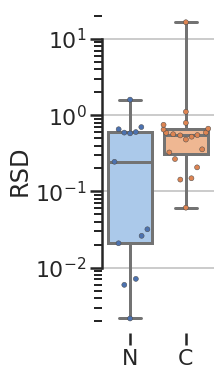

In [89]:
sns.set(style="ticks")
sns.set_context('poster')

# Initialize the figure
f, ax = plt.subplots(figsize=(2, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x='model', y='CV', data=df_reported,
            palette="pastel", whis="range")

# Add in points to show each observation
sns.swarmplot(x='model', y='CV', data=df_reported,
              linewidth=0.5)

# Tweak the visual presentation
ax.yaxis.grid(True)
ax.set(ylabel="RSD")
ax.set_yscale('log')
ax.set(xlabel="")
sns.despine(trim=True, bottom=True)

# statistical annotation
#x1, x2 = 0, 1   # columns
#y, h, col = df_reported['CV'].max() + 0.1, 0.1, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h, "p = 0.29", ha='center', va='bottom', color=col)

In [90]:
ss.mannwhitneyu(df_reported[df_reported.model=='N'].CV, df_reported[df_reported.model=='C'].CV)

MannwhitneyuResult(statistic=93.0, pvalue=0.08934508791051515)

In [91]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/isus/cv_original.pdf')

## Standardised model

In [92]:
cv_sta = weighted_cv(df_sta, w_sta, sample_size=len(df_sta))

In [93]:
model = ['S',]*len(cv_sta)
frame = {'model': model, 'CV': cv_sta}
sta = pd.DataFrame(frame)

In [94]:
df = pd.concat([nyg, cou, sta])

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


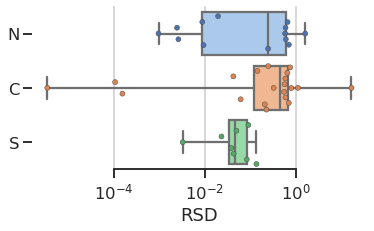

In [95]:
sns.set(style="ticks")
sns.set_context('talk')

# Initialize the figure
f, ax = plt.subplots(figsize=(6,3))

# Plot the orbital period with horizontal boxes
sns.boxplot(x='CV', y='model', data=df,
            palette="pastel", whis="range")

# Add in points to show each observation
sns.swarmplot(x='CV', y='model', data=df,
              linewidth=0.5)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(xlabel="RSD")
ax.set_xscale('log')
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [96]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/isus/compare_cv_full.pdf')

In [97]:
ss.mannwhitneyu(df[df.model=='N'].CV, df[df.model=='S'].CV)

MannwhitneyuResult(statistic=45.0, pvalue=0.31891519499830134)

In [98]:
ss.mannwhitneyu(df[df.model=='C'].CV, df[df.model=='S'].CV)

MannwhitneyuResult(statistic=32.0, pvalue=0.00785462752352008)

In [99]:
ss.mannwhitneyu(df[df.model=='N'].CV, df[df.model=='C'].CV)

MannwhitneyuResult(statistic=115.0, pvalue=0.2965894121668926)

### Plot epsilon comparison

In [198]:
eps_nyg_r = h_nyg_r.get_weighted_distances()
eps_nyg_s = h_nyg_s.get_weighted_distances()

In [199]:
eps_nyg = np.array([])
eps_nyg = (np.array(eps_nyg_r.sample(n=100,axis=0,weights=eps_nyg_r.w,replace=True).distance) +
           np.array(eps_nyg_s.sample(n=100,axis=0,weights=eps_nyg_s.w,replace=True).distance))
eps_nyg = pd.DataFrame({'model': 'N', 'eps': eps_nyg, 'exp': 'all'})

In [200]:
eps_cou_a = h_cou_a.get_weighted_distances()
eps_cou_i = h_cou_i.get_weighted_distances()

In [201]:
# Create virtual COU epsilon dataset by summing
eps_cou = np.array([])
eps_cou = (np.array(eps_cou_a.sample(n=100,axis=0,weights=eps_cou_a.w,replace=True).distance) +
           np.array(eps_cou_i.sample(n=100,axis=0,weights=eps_cou_i.w,replace=True).distance))

In [202]:
eps_cou = pd.DataFrame({'model': 'C', 'eps': eps_cou, 'exp': 'all'})

In [203]:
eps_sta = h_sta.get_weighted_distances()

In [204]:
eps_sta = eps_sta.sample(n=100,axis=0,weights=eps_sta.w,replace=True).distance
eps_sta = pd.DataFrame({'model': 'S', 'eps': eps_sta, 'exp': 'all'})

In [205]:
eps = pd.concat([eps_nyg,eps_cou,eps_sta])

In [206]:
eps['normalised'] = (eps['eps']-eps['eps'].min())/(eps['eps'].max()-eps['eps'].min())

Text(0, 0.5, 'normalised residual')

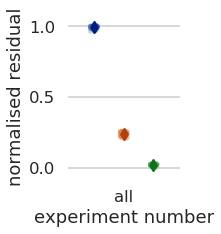

In [207]:
sns.set_context('talk')
sns.set_style('whitegrid')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

f, ax = plt.subplots(figsize=(2, 3))
sns.despine(bottom=True, left=True)

sns.stripplot(x='exp', y='normalised', hue='model', data=eps, 
              dodge=True, jitter=True, alpha=.25, zorder=1,
              palette='deep', ax=ax)

sns.pointplot(x="exp", y="normalised", hue="model",
              data=eps,
              estimator=np.median,
              dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

ax.get_legend().remove()
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[3:], labels[3:], title="model",
#          handletextpad=0, columnspacing=1,
#          loc="best", ncol=3, frameon=True)
ax.set_xlabel('experiment number')
ax.set_ylabel('normalised residual')

In [208]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/isus/eps_stripplot.pdf')

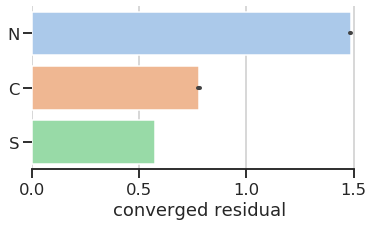

In [214]:
sns.set_context('talk')
sns.set_style("ticks")

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

f, ax = plt.subplots(figsize=(6,3))

sns.barplot(x="eps", y="model", data=eps, palette='pastel')

ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlabel="converged residual")
sns.despine(trim=True, left=True)

In [215]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/isus/eps_compare.pdf')

## Plot simulation outputs

In [129]:
from ionchannelABC.visualization import plot_sim_results

In [130]:
from experiments.isus_wang import (wang_act_and_kin,
                                   wang_inact)
from experiments.isus_courtemanche import (courtemanche_inact_kin,
                                           courtemanche_deact)
from experiments.isus_firek import (firek_inact)
from experiments.isus_nygren import (nygren_inact_kin,
                                     nygren_rec)

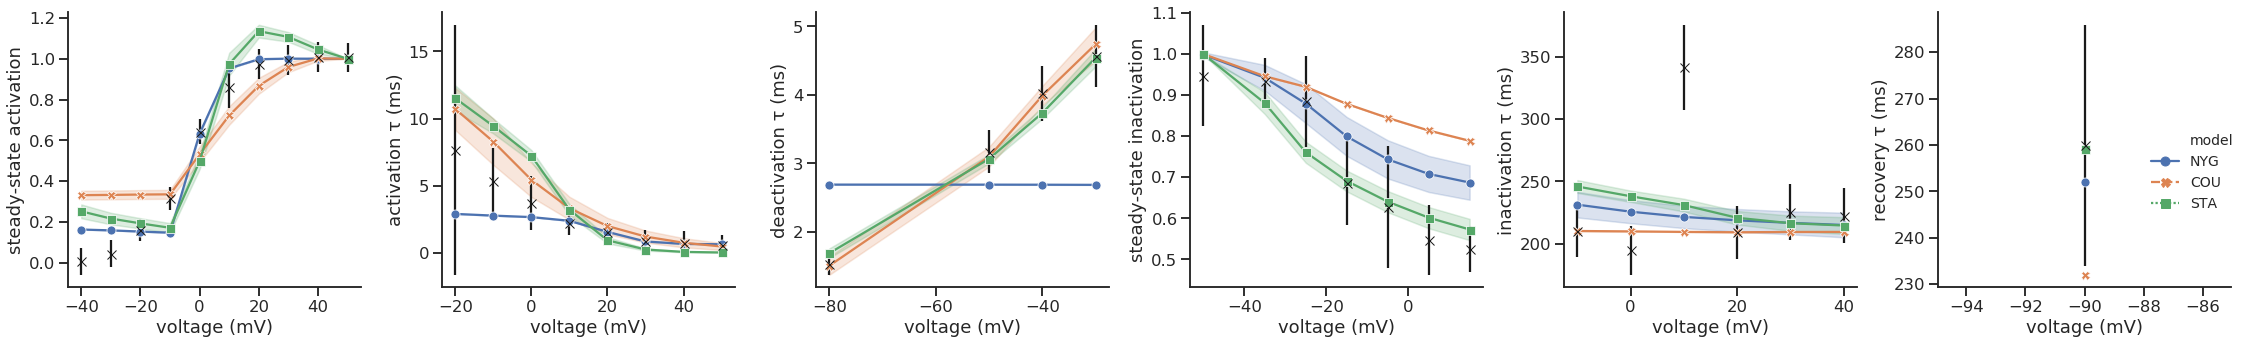

In [132]:
sns.set(style="ticks")

sns.set_context('talk')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

g = plot_sim_results(['models/nygren_isus_adj.mmt',
                      'models/nygren_isus_adj.mmt',
                      'models/courtemanche_isus_adj.mmt',
                      'models/courtemanche_isus_adj.mmt',
                      'models/standardised_isus.mmt'],
                     wang_act_and_kin,
                    courtemanche_deact,
                    firek_inact,
                    nygren_inact_kin,
                    nygren_rec,
                     temp_match_model = 4,
                     masks=[[(0,1),2]+[None,]*3,
                            [None,]*2+[3,4,5],
                            [(0,1),2]+[None,]*3,
                            [None,]*2+[3,4,5],
                            None],
                     df=[df_nyg_r,
                         df_nyg_s,
                         df_cou_a,
                         df_cou_i,
                         df_sta], 
                     w=[w_nyg_r,
                        w_nyg_s,
                        w_cou_a,
                        w_cou_i,
                        w_sta])

ylabels = ["steady-state activation", "activation τ (ms)", "deactivation τ (ms)", "steady-state inactivation",
           "inactivation τ (ms)", "recovery τ (ms)"]
#titles = ["Steady-state activation", "Activation time constant", "Deactivation time constant",
#          "Steady-state inactivation",
#          "Inactivation time constant", "Recovery time constant"]
for ax in g.axes.flatten():
    ax.set_xlabel("voltage (mV)")
for ax, yl in zip(g.axes.flatten(), ylabels):
    ax.set_ylabel(yl)
for ax in g.axes.flatten():
    ax.set_title("")

plt.tight_layout()

In [133]:
g.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/isus/compare_out.pdf')

### Compare SS and tau values

In [151]:
import myokit
nyg = 'models/nygren_isus_adj.mmt'
cou ='models/courtemanche_isus_adj.mmt'
std = 'models/standardised_isus.mmt'

In [135]:
v = np.arange(-80, 50, 0.5)

In [136]:
nyg_vars = {'ri': 'isus.r_inf',
            'si': 'isus.s_inf',
            'rt': 'isus.tau_r',
            'st': 'isus.tau_s'}

In [137]:
cou_vars = {'ri': 'isus.a_inf',
            'si': 'isus.i_inf',
            'rt': 'isus.tau_a',
            'st': 'isus.tau_i'}

In [138]:
from ionchannelABC.visualization import plot_variables

In [141]:
nyg_pars_reported_r = df_nyg_reported_r.sample(n=100, weights=w_nyg_reported_r, replace=True)
nyg_pars_reported_r = nyg_pars_reported_r.set_index([pd.Index(range(100))])
nyg_pars_reported_s = df_nyg_reported_s.sample(n=100, weights=w_nyg_reported_s, replace=True)
nyg_pars_reported_s = nyg_pars_reported_s.set_index([pd.Index(range(100))])

nyg_pars_reported = pd.concat([nyg_pars_reported_r,nyg_pars_reported_s],axis=1).to_dict(orient='records')

In [142]:
cou_pars_reported_a = df_cou_reported_a.sample(n=100, weights=w_cou_reported_a, replace=True)
cou_pars_reported_a = cou_pars_reported_a.set_index([pd.Index(range(100))])
cou_pars_reported_i = df_cou_reported_i.sample(n=100, weights=w_cou_reported_i, replace=True)
cou_pars_reported_i = cou_pars_reported_i.set_index([pd.Index(range(100))])

cou_pars_reported = pd.concat([cou_pars_reported_a,cou_pars_reported_i],axis=1).to_dict(orient='records')

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


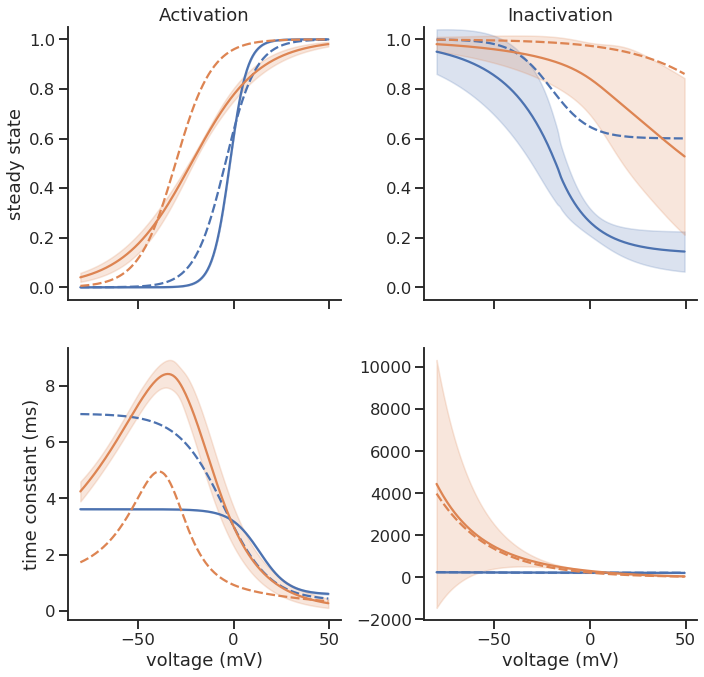

In [143]:
sns.set_context('talk')
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

f, ax = plot_variables(v, [nyg_vars, cou_vars], 
                       [nyg, cou], 
                       [nyg_pars_reported, cou_pars_reported],
                       original=[True,True],
                       figshape=(2,2))

ax[0][0].set_ylabel('steady state')
for a in ax[0][1:]:
    a.set_ylabel('')
ax[0][0].set_title('Activation')
ax[0][1].set_title('Inactivation')

for a in ax[0][:]:
    a.set_ylim((-0.05, 1.05))

ax[1][0].set_ylabel('time constant (ms)')
for a in ax[1][1:]:
    a.set_ylabel('')
    
for a in ax[1][:]:
    a.set_xlabel('voltage (mV)')
    
for a in ax.flatten():
    x0,x1 = a.get_xlim()
    y0,y1 = a.get_ylim()
    a.set_aspect(abs(x1-x0)/abs(y1-y0))
    
    
plt.tight_layout()

In [144]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/isus/original_ss_tau.pdf')

In [146]:
nyg_pars_r = df_nyg_r.sample(n=100, weights=w_nyg_r, replace=True)
nyg_pars_r = nyg_pars_r.set_index([pd.Index(range(100))])
nyg_pars_s = df_nyg_s.sample(n=100, weights=w_nyg_s, replace=True)
nyg_pars_s = nyg_pars_s.set_index([pd.Index(range(100))])

nyg_pars = pd.concat([nyg_pars_r,nyg_pars_s],axis=1).to_dict(orient='records')

In [147]:
cou_pars_a = df_cou_a.sample(n=100, weights=w_cou_a, replace=True)
cou_pars_a = cou_pars_a.set_index([pd.Index(range(100))])
cou_pars_i = df_cou_i.sample(n=100, weights=w_cou_i, replace=True)
cou_pars_i = cou_pars_i.set_index([pd.Index(range(100))])
cou_pars = pd.concat([cou_pars_a,cou_pars_i],axis=1).to_dict(orient='records')

In [153]:
std_vars = {'ri': 'isus.r_ss',
            'si': 'isus.s_ss',
            'rt': 'isus.tau_r',
            'st': 'isus.tau_s'}

In [154]:
N = 100

nyg_pars_r = df_nyg_r.sample(n=N, weights=w_nyg_r, replace=True)
nyg_pars_r = nyg_pars_r.set_index([pd.Index(range(N))])
nyg_pars_s = df_nyg_s.sample(n=N, weights=w_nyg_s, replace=True)
nyg_pars_s = nyg_pars_s.set_index([pd.Index(range(N))])

nyg_pars = pd.concat([nyg_pars_r,nyg_pars_s],axis=1).to_dict(orient='records')

cou_pars_a = df_cou_a.sample(n=N, weights=w_cou_a, replace=True)
cou_pars_a = cou_pars_a.set_index([pd.Index(range(N))])
cou_pars_i = df_cou_i.sample(n=N, weights=w_cou_i, replace=True)
cou_pars_i = cou_pars_i.set_index([pd.Index(range(N))])
cou_pars = pd.concat([cou_pars_a,cou_pars_i],axis=1).to_dict(orient='records')

std_pars = df_sta.sample(n=N, weights=w_sta, replace=True)
std_pars = std_pars.set_index([pd.Index(range(N))])
std_pars = std_pars.to_dict(orient='records')

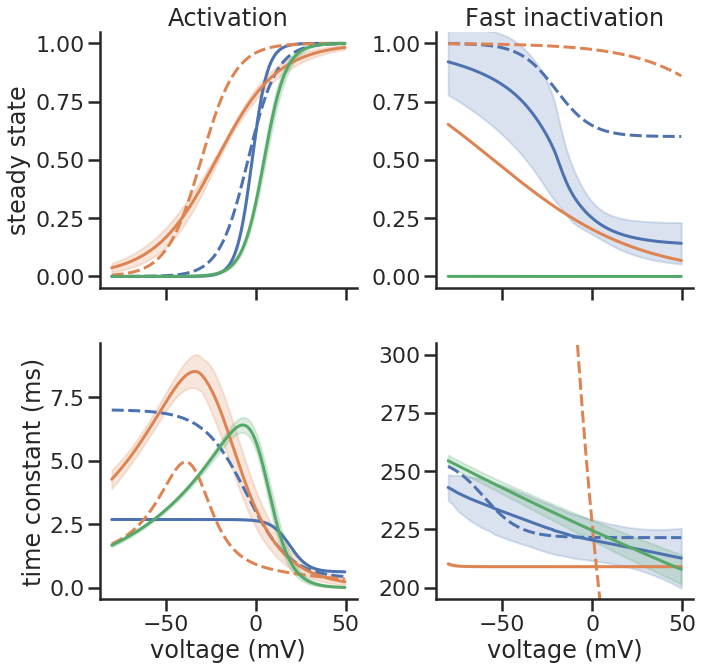

In [159]:
sns.set_context('poster')
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

f, ax = plot_variables(v, [nyg_vars, cou_vars, std_vars], 
                       [nyg, cou, std], 
                       [nyg_pars, cou_pars, std_pars],
                       original=[True,True,False],
                       figshape=(2,2))

ax[0][0].set_ylabel('steady state')
for a in ax[0][1:]:
    a.set_ylabel('')
ax[0][0].set_title('Activation')
ax[0][1].set_title('Fast inactivation')

for a in ax[0][:]:
    a.set_ylim((-0.05, 1.05))

ax[1][0].set_ylabel('time constant (ms)')
for a in ax[1][1:]:
    a.set_ylabel('')
    
for a in ax[1][:]:
    a.set_xlabel('voltage (mV)')

ax[1][1].set_ylim([-0.05*100+200, 1.05*100+200])
    
for a in ax.flatten():
    x0,x1 = a.get_xlim()
    y0,y1 = a.get_ylim()
    a.set_aspect(abs(x1-x0)/abs(y1-y0))
    
plt.tight_layout()

In [160]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/isus/compare_gates.pdf')

### Compare final pulse after pulse train

In [161]:
import myokit

In [176]:
nsteps = 100
period = 10000
tstep = 1000
vhold = -50
vstep = -10

pulsetrain = myokit.pacing.steptrain([vstep,]*nsteps,
                                     vhold,
                                     period-tstep,
                                     tstep)

In [177]:
# nygren_ina_full has had tau values adjusted for temperature to 310K
models = [myokit.load_model(modelfile) for modelfile in ['models/nygren_isus_adj.mmt',
                                                         'models/courtemanche_isus_adj.mmt',
                                                         'models/standardised_isus.mmt']]
for m in models:
    pace = m.get('membrane.V')
    if pace.binding() != 'pace':
        if pace.is_state():
            pace.demote()
        pace.set_rhs(0)
        pace.set_binding('pace')

In [178]:
sims = [myokit.Simulation(m, pulsetrain) for m in models]

In [179]:
par_samples = [nyg_pars, cou_pars, std_pars]

In [180]:
import time

all_samples = pd.DataFrame({})
for i, s in enumerate(sims):
    s.reset()
    # store original
    if models[i].name() != 'STA':
        datalog = s.run(pulsetrain.characteristic_time(),
                        log=['isus.g','engine.time','membrane.V'],
                        log_interval=1)
        datalog = datalog.trim((nsteps)*period-tstep-20, (nsteps)*period, adjust=True)
        df = {'time': datalog['engine.time'],
              'gate': datalog.npview()['isus.g']/max(datalog['isus.g']),
              'sample': 0,
              'model': models[i].name(),
              'type': 'original'}
        df = pd.DataFrame(df)
        all_samples = all_samples.append(df, ignore_index=True)
    
    # re-calibrated
    for j, par_sample in enumerate(par_samples[i]):
        s.reset()
        for p, v in par_sample.items():
            name = p
            value = v
            if p.startswith("log"):
                name = p[4:]
                value = 10**v
            s.set_constant(name, value)
            
        # Log run time for comparisons
        t0 = time.time()
        datalog = s.run(pulsetrain.characteristic_time(),
                        log=['isus.g','engine.time','membrane.V'],
                        log_interval=1)
        t1 = time.time()
        dt = t1-t0
        
        datalog = datalog.trim((nsteps)*period-tstep-20, (nsteps)*period, adjust=True)
        df = {'time': datalog['engine.time'],
              'gate': datalog.npview()['isus.g']/max(datalog['isus.g']),
              'sample': j,
              'model': models[i].name(),
              'type': 'recalibrated',
              'runtime': dt}
        df = pd.DataFrame(df)
        all_samples = all_samples.append(df, ignore_index=True)

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [181]:
recalibrated_df = all_samples[all_samples['type']=='recalibrated']

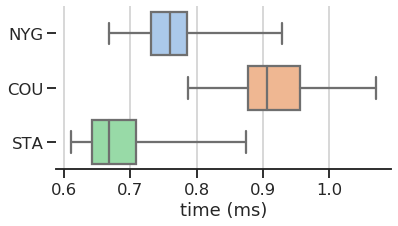

In [182]:
sns.set(style="ticks")
sns.set_context('talk')

# Initialize the figure
f, ax = plt.subplots(figsize=(6, 3))

# Plot the orbital period with horizontal boxes
sns.boxplot(x='runtime', y='model', data=recalibrated_df,
            palette="pastel", whis="range")

# Add in points to show each observation
#sns.swarmplot(x='model', y='runtime', data=recalibrated_df,
#              linewidth=0.5)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlabel="time (ms)")
sns.despine(left=True)

# statistical annotation
#x1, x2 = 0, 1   # columns
#y, h, col = recalibrated_df['runtime'].max() + 0.01, 0.01, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h, "p < 0.001", ha='center', va='bottom', color=col)

In [183]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/isus/runtime_compare.pdf')

In [184]:
all_samples_detail = all_samples[(all_samples['time']>=19) & (all_samples['time'] < 50)]

Text(0.5, 1.0, '')

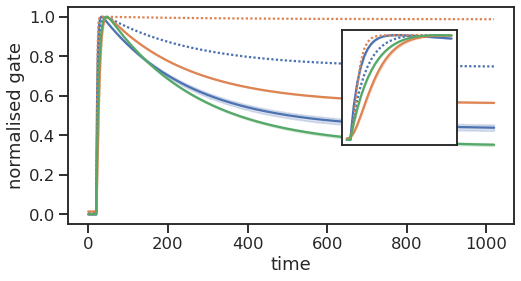

In [185]:
sns.set_context('talk')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

f, ax = plt.subplots(figsize=(8,4))

g = sns.lineplot(x='time', y='gate', hue='model', style='type',
                 #kind='line', 
                 dashes = [(1,1),''],
                 data=all_samples, ax=ax,
                 legend=False)
                 #legend=False, height=5, aspect=1)

ax2 = plt.axes([.6, .4, .2, .4])
sns.lineplot(x='time',y='gate',hue='model',style='type',
             dashes=[(1,1),''],
             #data=all_samples_detail[all_samples_detail['type']=='original'], ax=ax2,
             data=all_samples_detail, ax=ax2,
             legend=False)
plt.setp(ax2, xticks=[], yticks=[])
ax2.set_xlabel('')
ax2.set_ylabel('')

#ax3 = plt.axes([.65, .25, .3, .15])
#sns.lineplot(x='time',y='gate',hue='model',
#             data=all_samples_detail[all_samples_detail['type']=='recalibrated'], ax=ax3,
#             legend=False)
#plt.setp(ax3, xticks=[], yticks=[])
#ax3.set_xlabel('')
#ax3.set_ylabel('')

#for a in g.axes.flatten():
ax.set_ylabel('normalised gate')
ax.set_title('')
#ax.axvline(x=9.8, linestyle='--', color='k', linewidth=2)
#ax.axvline(x=14, linestyle='--', color='k', linewidth=2)

In [187]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/isus/trace_compare_out.pdf')

## Per-Experiment Comparison

In [188]:
N = 100

nyg_pars_r = df_nyg_r.sample(n=N, weights=w_nyg_r, replace=True)
nyg_pars_r = nyg_pars_r.set_index([pd.Index(range(N))])
nyg_pars_r = nyg_pars_r.to_dict(orient='records')

nyg_pars_s = df_nyg_s.sample(n=N, weights=w_nyg_s, replace=True)
nyg_pars_s = nyg_pars_s.set_index([pd.Index(range(N))])
nyg_pars_s = nyg_pars_s.to_dict(orient='records')
#nyg_pars = pd.concat([nyg_pars_r,nyg_pars_s],axis=1).to_dict(orient='records')

cou_pars_a = df_cou_a.sample(n=N, weights=w_cou_a, replace=True)
cou_pars_a = cou_pars_a.set_index([pd.Index(range(N))])
cou_pars_a = cou_pars_a.to_dict(orient='records')

cou_pars_i = df_cou_i.sample(n=N, weights=w_cou_i, replace=True)
cou_pars_i = cou_pars_i.set_index([pd.Index(range(N))])
cou_pars_i = cou_pars_i.to_dict(orient='records')
#cou_pars = pd.concat([cou_pars_a,cou_pars_i],axis=1).to_dict(orient='records')

std_pars = df_sta.sample(n=N, weights=w_sta, replace=True)
std_pars = std_pars.set_index([pd.Index(range(N))])
std_pars = std_pars.to_dict(orient='records')

In [189]:
from ionchannelABC.experiment import setup
from ionchannelABC.distance import IonChannelDistance

In [191]:
from experiments.isus_wang import (wang_act,
                                   wang_act_kin,
                                   wang_inact)
from experiments.isus_courtemanche import (courtemanche_inact_kin,
                                           courtemanche_deact)
from experiments.isus_firek import (firek_inact)
from experiments.isus_nygren import (nygren_inact_kin,
                                     nygren_rec)

experiments = [wang_act,
               wang_act_kin,
               courtemanche_deact,
               firek_inact,
               nygren_inact_kin,
               nygren_rec]
models = ['models/nygren_isus_adj.mmt',
          'models/courtemanche_isus_adj.mmt',
          'models/standardised_isus.mmt']
pars = [[nyg_pars_r,nyg_pars_s], [cou_pars_a,cou_pars_i], std_pars]
names = ['N','C','S']

In [192]:
def experiment_dist(pars, modelfile, experiment):
    eps = []
    observ, model, sum_stats = setup(modelfile,
                                     experiment)
    obs = observ.to_dict()['y']
    obs = {str(k): v for k, v in obs.items()}
    dist = IonChannelDistance(exp_id=list(observ.exp_id),
                              variance=list(observ.variance),
                              delta=0.05)
    for sample in pars:
        eps.append(dist(sum_stats(model(sample)), obs, None))    
    return eps

In [193]:
df = pd.DataFrame({})
mask = [[0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1], None]
for j, exp in enumerate(experiments):
    df_ = pd.DataFrame({})
    for i, m in enumerate(models):
        if mask[i] is not None:
            eps = np.array(
                experiment_dist(pars[i][mask[i][j]],
                                m,
                                exp)
                )
        else:
            eps = np.array(
                experiment_dist(pars[i],
                                m,
                                exp)
                )
        df_ = df_.append(pd.DataFrame({'model': names[i],
                                       'exp': str(j),
                                       'eps': eps[~np.isinf(eps)]}))
    eps_max = df_['eps'].max()
    eps_min = df_['eps'].min()
    df_['eps'] = (df_['eps'] - eps_min)/(eps_max-eps_min)
    df = df.append(df_)

Text(0, 0.5, 'normalised residual')

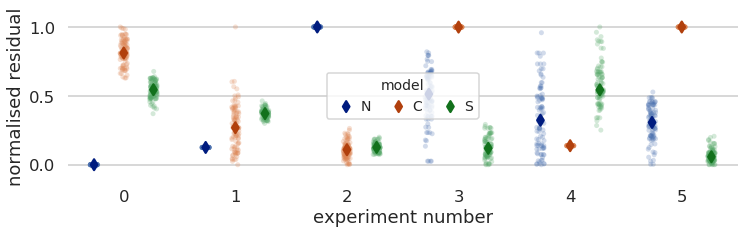

In [194]:
sns.set_context('talk')
sns.set_style('whitegrid')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

fig, ax = plt.subplots(figsize=(12, 3))
sns.despine(bottom=True, left=True)

sns.stripplot(x='exp', y='eps', hue='model', data=df, 
            dodge=True, jitter=True, alpha=.25, zorder=1,
              palette='deep', ax=ax)

sns.pointplot(x="exp", y="eps", hue="model",
              data=df,
              estimator=np.median,
              dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="model",
          handletextpad=0, columnspacing=1,
          loc="best", ncol=3, frameon=True)
ax.set_xlabel('experiment number')
ax.set_ylabel('normalised residual')

In [196]:
fig.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/isus/per-exp-dist.pdf')